In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pypfopt import EfficientFrontier

In [5]:
file_path = r"C:\Users\kamod\OneDrive\Escritorio\2024-2 U\Intc Soc\modelos-de-interacciones-sociales--main\trabajo final\Datos\Price_Stocks.xlsx"

retorno_df = pd.read_excel(file_path, sheet_name="Retorno")

In [6]:
retorno_stats = retorno_df.describe().round(4)
retorno_stats

,Exchange Date,AAP,AAPL,AXP,AZO,CPB,CSCO,CVX,DUK,DXC,...,MDLZ,MU,NTRZ,ORCL,PG,RTX,SLB,URI,V,VLO
count,3731,3730.0000,3730.0000,3730.0000,3730.0000,3730.0000,3730.0000,3730.0000,3730.0000,3730.0000,...,3730.0000,3730.0000,3730.0000,3730.0000,3730.0000,3730.0000,3730.0000,3730.0000,3730.0000,3730.0000
mean,2017-05-31 16:51:12.205842944,0.0002,0.0011,0.0007,0.0009,0.0002,0.0004,0.0003,0.0003,0.0004,...,0.0004,0.0011,0.0003,0.0007,0.0003,0.0004,0.0001,0.0016,0.0008,0.0009
min,2010-01-04 00:00:00,-0.3504,-0.1286,-0.1482,-0.1594,-0.1237,-0.1621,-0.2212,-0.1150,-0.3047,...,-0.1143,-0.1982,-0.1819,-0.1350,-0.0874,-0.1448,-0.2742,-0.1837,-0.1355,-0.1922
25%,2013-09-17 12:00:00,-0.0088,-0.0075,-0.0071,-0.0063,-0.0064,-0.0067,-0.0076,-0.0054,-0.0098,...,-0.0060,-0.0147,-0.0079,-0.0069,-0.0048,-0.0063,-0.0111,-0.0133,-0.0070,-0.0115
50%,2017-06-01 00:00:00,0.0004,0.0009,0.0007,0.0008,0.0005,0.0004,0.0006,0.0006,0.0006,...,0.0005,0.0007,0.0007,0.0008,0.0004,0.0004,-0.0002,0.0015,0.0013,0.0008
75%,2021-02-14 00:00:00,0.0100,0.0104,0.0092,0.0084,0.0071,0.0080,0.0082,0.0065,0.0105,...,0.0068,0.0173,0.0091,0.0088,0.0058,0.0072,0.0110,0.0167,0.0086,0.0135
max,2024-10-29 00:00:00,0.1656,0.1198,0.2188,0.1178,0.1011,0.1595,0.2274,0.1230,0.4208,...,0.1128,0.2344,0.2064,0.2043,0.1201,0.1576,0.1991,0.2218,0.1500,0.3120
std,NaN,0.0213,0.0176,0.0183,0.0147,0.0137,0.0164,0.0170,0.0119,0.0281,...,0.0126,0.0297,0.0177,0.0169,0.0108,0.0156,0.0229,0.0284,0.0158,0.0246


In [12]:
retorno_df

,Exchange Date,AAP,AAPL,AXP,AZO,CPB,CSCO,CVX,DUK,DXC,...,MDLZ,MU,NTRZ,ORCL,PG,RTX,SLB,URI,V,VLO
0,2024-10-29,-0.018873,-0.001050,-0.002836,-0.008963,-0.009868,0.009045,-0.011988,-0.018965,0.026394,...,-0.001294,-0.004700,0.003043,0.004466,-0.009273,-0.012836,-0.014617,-0.011799,-0.000070,-0.020830
1,2024-10-28,0.009526,0.008599,0.015411,-0.007994,0.011897,-0.008253,-0.001790,-0.001280,0.020131,...,0.004478,-0.014086,0.016868,-0.006339,0.006420,0.002157,-0.008385,0.014954,0.008732,-0.001057
2,2024-10-25,-0.014485,0.003643,-0.009741,-0.007069,0.001702,-0.003931,0.002393,-0.015208,-0.003511,...,-0.010293,0.009920,-0.025294,-0.004932,-0.008254,-0.000080,0.011879,-0.015140,-0.005261,0.007917
3,2024-10-24,-0.015059,-0.000823,-0.004609,-0.013546,0.000639,-0.005686,-0.000199,-0.012856,-0.006477,...,-0.008645,0.017135,0.002731,0.007395,0.000236,-0.016036,-0.020888,-0.011017,-0.001903,-0.011513
4,2024-10-23,-0.023226,-0.021623,-0.004295,0.007724,-0.008446,-0.005654,-0.002915,0.005756,-0.019062,...,-0.011072,-0.025691,0.070153,-0.012606,-0.000707,0.013383,0.004770,-0.015670,-0.003617,-0.020780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3726,2010-01-08,0.003953,0.006648,-0.000715,-0.012842,-0.006356,0.005300,0.001765,0.000594,-0.002616,...,0.001038,0.023985,0.004407,0.012305,-0.001322,0.001986,0.016401,-0.022449,0.002766,-0.013720
3727,2010-01-07,-0.000247,-0.001849,0.011810,0.013270,-0.015201,0.004505,-0.003767,0.004776,-0.010012,...,-0.002416,-0.033868,0.009478,-0.003271,-0.005423,0.004274,0.010320,-0.013092,0.009307,0.007443
3728,2010-01-06,0.008719,-0.015906,0.016165,-0.009380,-0.011200,-0.006509,0.000126,0.003595,0.003638,...,0.006952,0.004476,-0.014487,-0.014504,-0.004743,-0.005244,0.022288,0.000000,-0.013428,0.025068
3729,2010-01-05,-0.005944,0.001729,-0.002199,-0.008353,0.001771,-0.004455,0.007083,-0.016500,-0.000346,...,0.048852,0.029493,-0.001333,-0.001207,0.000327,-0.014938,0.002831,-0.010956,-0.011459,0.025713


In [41]:
retorno_df_clean = retorno_df.dropna()
retorno_df_clean.loc[:, 'Exchange Date'] = pd.to_datetime(retorno_df_clean['Exchange Date'], errors='coerce')
retorno_df_clean = retorno_df_clean.set_index('Exchange Date')
retorno_df_clean = retorno_df_clean.select_dtypes(include=['float64', 'int64'])

# Sort data by Exchange Date in ascending order
retorno_df_clean = retorno_df_clean.sort_index()

window_size = 200
returns, dates, wealth = [], [], [1]  # Start wealth with 1

for start in range(window_size, len(retorno_df_clean)):
    window_data = retorno_df_clean.iloc[start - window_size:start]
    mu = window_data.mean()
    S = window_data.cov()
    ef = EfficientFrontier(mu, S)
    weights = ef.max_sharpe()
    next_period_returns = retorno_df_clean.iloc[start].dot(pd.Series(weights))
    dates.append(retorno_df_clean.index[start])
    returns.append(next_period_returns)
    
    # Calculate wealth for the next period
    new_wealth = wealth[-1] * (1 + next_period_returns)
    wealth.append(new_wealth)
    
    if start % 500 == 0:
        print(f"Iteration {start}: Return = {next_period_returns}, Wealth = {new_wealth}")

result_df = pd.DataFrame({'Date': dates, 'Return': returns, 'Wealth': wealth[1:]})  # Skip the initial wealth of 1


Iteration 500: Return = -0.0076760782078560096, Wealth = 1.202966659661351
Iteration 1000: Return = 0.0023069258948083043, Wealth = 1.7874252181261965
Iteration 1500: Return = -0.010110538327327938, Wealth = 2.7801662856089107
Iteration 2000: Return = -0.00048397874594461655, Wealth = 3.656695681665641
Iteration 2500: Return = 0.012523317056165635, Wealth = 5.010916064849344
Iteration 3000: Return = -0.007874134121351486, Wealth = 7.265873050531398
Iteration 3500: Return = 0.006615453635551136, Wealth = 6.858297143925062


In [43]:
wealth

[1,
 np.float64(1.0087909583381742),
 np.float64(1.0078932835066272),
 np.float64(1.018759146594379),
 np.float64(1.022730537020916),
 np.float64(1.025297735709037),
 np.float64(1.0225819034822858),
 np.float64(1.0321697525584534),
 np.float64(1.0409062942661809),
 np.float64(1.0347309493954977),
 np.float64(1.041097999067218),
 np.float64(1.0428322735879025),
 np.float64(1.0513081119049021),
 np.float64(1.0523526077036653),
 np.float64(1.061114652359453),
 np.float64(1.060554459551468),
 np.float64(1.0787708645668983),
 np.float64(1.0854726289058378),
 np.float64(1.0723711449005868),
 np.float64(1.0769002800868313),
 np.float64(1.0661527219883786),
 np.float64(1.0689011033765778),
 np.float64(1.0775282652071094),
 np.float64(1.0786921697774714),
 np.float64(1.0947852437304504),
 np.float64(1.096333779868081),
 np.float64(1.111087778964231),
 np.float64(1.1141218358130005),
 np.float64(1.1055595591977274),
 np.float64(1.1045729661204287),
 np.float64(1.114607961744027),
 np.float64(1.1

In [7]:
retorno_stats = retorno_df.describe().round(4)
retorno_stats_subset = retorno_stats.iloc[:, 2:7]
retorno_stats_subset

,AAPL,AXP,AZO,CPB,CSCO
count,3730.0000,3730.0000,3730.0000,3730.0000,3730.0000
mean,0.0011,0.0007,0.0009,0.0002,0.0004
min,-0.1286,-0.1482,-0.1594,-0.1237,-0.1621
25%,-0.0075,-0.0071,-0.0063,-0.0064,-0.0067
50%,0.0009,0.0007,0.0008,0.0005,0.0004
75%,0.0104,0.0092,0.0084,0.0071,0.0080
max,0.1198,0.2188,0.1178,0.1011,0.1595
std,0.0176,0.0183,0.0147,0.0137,0.0164


c:\Users\kamod\miniconda3\envs\envtopicos\Lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
c:\Users\kamod\miniconda3\envs\envtopicos\Lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


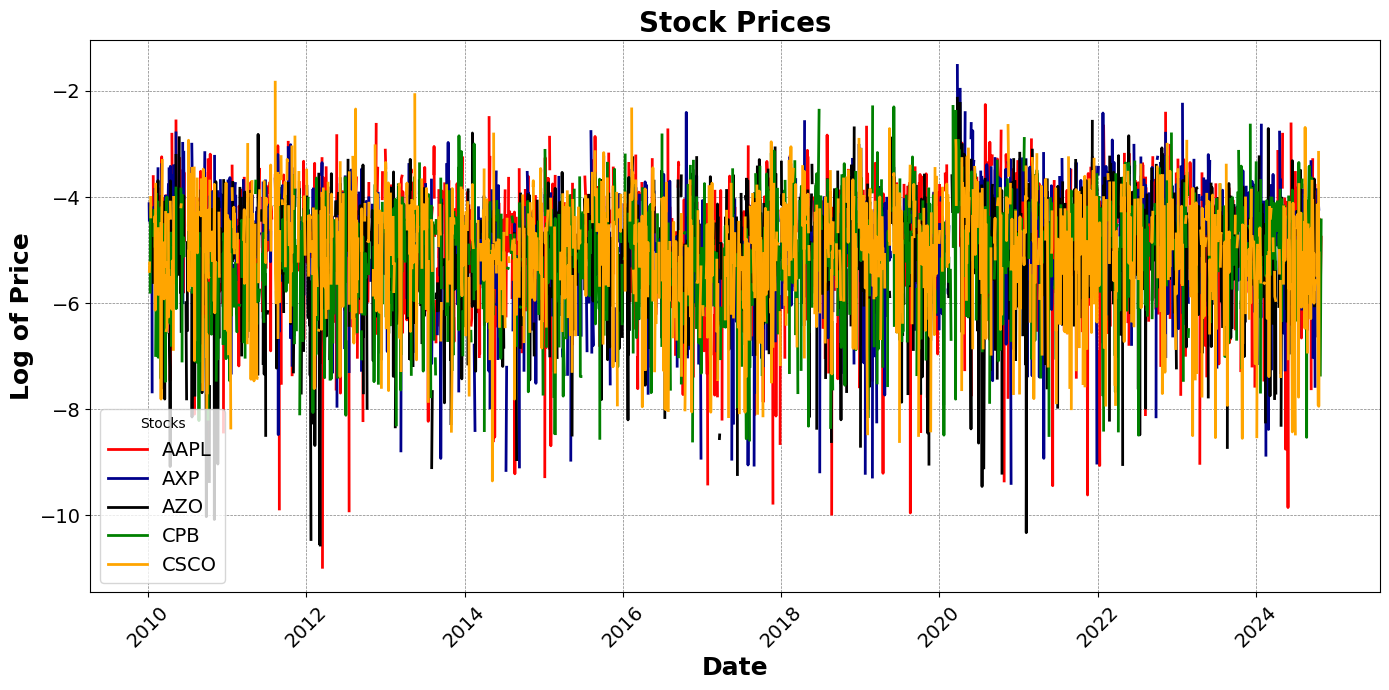

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Load the data from the specified sheet
file_path = r"C:\Users\kamod\OneDrive\Escritorio\2024-2 U\Intc Soc\modelos-de-interacciones-sociales--main\trabajo final\Datos\Price_Stocks.xlsx"
close_df = pd.read_excel(file_path, sheet_name="Retorno")

# Ensure the 'Exchange Date' column is in datetime format
close_df['Exchange Date'] = pd.to_datetime(close_df['Exchange Date'])
close_df.set_index('Exchange Date', inplace=True)

# Select columns 2 to 6 (adjusting for zero-based indexing)
close_df_subset = close_df.iloc[:, 1:6]  # This selects columns 2 to 6

# Take the natural logarithm of the selected columns
ln_close_df_subset = np.log(close_df_subset)

# Specify colors for each stock
colors = ['red', 'darkblue', 'black', 'green', 'orange']  # You can adjust the colors as needed

# Create the time series plot
plt.figure(figsize=(14, 7))

# Plot each column with specified colors
for column, color in zip(ln_close_df_subset.columns, colors):
    plt.plot(ln_close_df_subset.index, ln_close_df_subset[column], label=column, color=color, linewidth=2)

# Update titles and labels with larger font sizes
plt.title('Stock Prices', fontsize=20, fontweight='bold')  # Larger title font
plt.xlabel('Date', fontsize=18, fontweight='bold')          # Larger x label font
plt.ylabel('Log of Price', fontsize=18, fontweight='bold')  # Larger y label font
plt.xticks(rotation=45, fontsize=14)                        # Larger x tick font
plt.yticks(fontsize=14)                                      # Larger y tick font
plt.legend(title='Stocks', fontsize=14)                      # Legend font size
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Save the plot to the same directory as the file
save_path = os.path.join(os.path.dirname(file_path), 'stock_prices_plot.png')
plt.savefig(save_path)

# Show the plot
plt.show()
